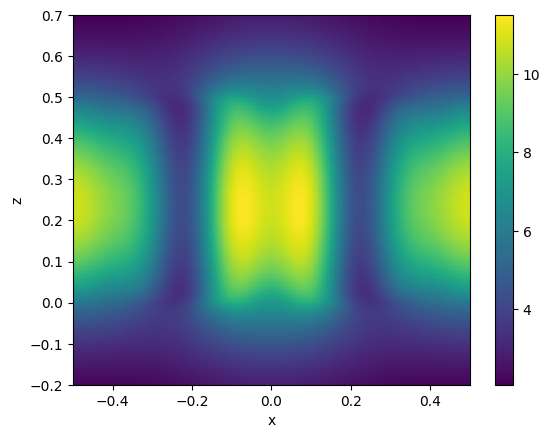

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

"""
A photonic-crystal slab in vacuum. Permittivity 12.
Square lattice with period 1 in both x and y.
thickness 0.5
A circular hole of radius 0.2 in each unit cell.

 → y
↓x      ⋮
     ◯ ◯ ◯
...  ◯ ◯ ◯ ...  (top view)
     ◯ ◯ ◯
        ⋮
"""

import numpy as np
from inkstone import Inkstone

s = Inkstone()
s.lattice = ((1, 0), (0, 1))
s.num_g = 100

s.AddMaterial(name='di', epsilon=12)

s.AddLayer(name='in', thickness=0, material_background='vacuum')
s.AddLayer(name='slab', thickness=0.5, material_background='di')
s.AddLayerCopy(name='out', original_layer='in', thickness=0)

s.AddPatternDisk(layer='slab', pattern_name='disk', material='vacuum', radius=0.2)

# Incident wave
s.SetExcitation(theta=0, phi=0, s_amplitude=0, p_amplitude=1)

s.frequency = 0.38

Ex, Ey, Ez, Hx, Hy, Hz = s.GetFields(xmin=-0.5, xmax=0.5, nx=101,
                                     y=0,
                                     zmin=-0.2, zmax=0.7, nz=91)

#%% plotting
from matplotlib import pyplot as plt

plt.pcolormesh(np.linspace(-0.5, 0.5, 101),
               np.linspace(-0.2, 0.7, 91),
               np.abs(Ex[0, :, :]).T, shading='gouraud')
plt.xlabel('x')
plt.ylabel('z')
plt.colorbar()